In [1]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot
from torchinfo import summary

In [3]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

In [4]:
np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

In [30]:
class Net(nn.Module):
    def __init__(self,n_input,n_output):
        super().__init__()
        self.l1=nn.Linear(n_input,n_output)

        nn.init.constant_(self.l1.weight,1.0)
        nn.init.constant_(self.l1.bias,1.0)

    def forward(self,x):
        x1=self.l1(x)
        return x1

In [31]:
inputs=torch.ones(100,1)

n_input=1
n_output=1
net=Net(n_input, n_output)

outputs=net(inputs)
outputs

tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
      

In [11]:
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url,sep="\s+", skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], 
    raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/8n/3xms3zmx18j3slgybtbk3m0h0000gp/T/ipykernel_82088/2674365070.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df=pd.read_csv(data_url,sep="\s+", skiprows=22, header=None)


In [14]:
x_org = np.hstack([raw_df.values[::2, :], 
    raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names=np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

print(x_org.shape,yt.shape)
print(feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [18]:
raw_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
5,392.83000,4.03,34.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.03237,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
7,394.63000,2.94,33.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.06905,0.00,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
9,396.90000,5.33,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
x=x_org[:,feature_names=="RM"]
print(x[:5,:])
print(yt[:5])

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
[24.  21.6 34.7 33.4 36.2]


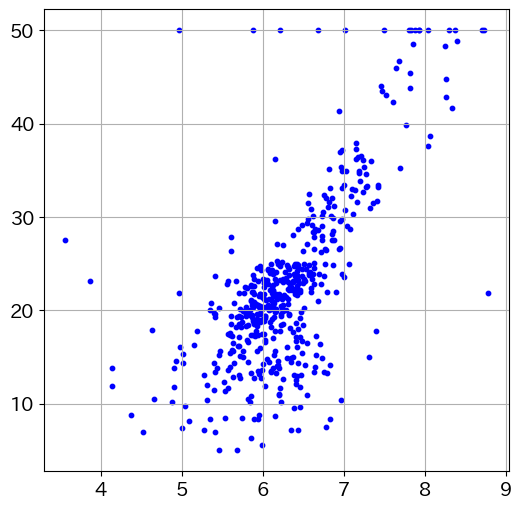

In [26]:
plt.scatter(x,yt,s=10,c="b")
plt.show()

In [27]:
n_input=x.shape[1] #入力次元数
n_output=1

In [32]:
net=Net(n_input,n_output)

In [43]:
summary(net)

Layer (type:depth-idx)                   Param #
Net                                      --
├─Linear: 1-1                            2
Total params: 2
Trainable params: 2
Non-trainable params: 0

In [45]:
criterion=nn.MSELoss()
lr=0.01
optimizer=optim.SGD(net.parameters(),lr=lr)

In [55]:
inputs=torch.tensor(x).float()
labels=torch.tensor(yt).float()
labels1=labels.view((-1,1))

In [63]:
class Net(nn.Module):
    def __init__(self,n_input,n_output):
        super().__init__()
        self.l1=nn.Linear(n_input,n_output)

        nn.init.constant_(self.l1.weight,1.0)
        nn.init.constant_(self.l1.bias,1.0)

    def forward(self,x):
        x1=self.l1(x)
        return x1

In [64]:
outputs=net(inputs)

In [65]:
net.l1.weight,net.l1.bias

(Parameter containing:
 tensor([[4.9928]], requires_grad=True),
 Parameter containing:
 tensor([1.6099], requires_grad=True))

In [66]:
loss=criterion(outputs,labels1)
loss.item()

161.23382568359375

In [67]:
loss.backward()

In [71]:
optimizer.zero_grad()
net.l1.weight.grad,net.l1.bias.grad

(None, None)

In [69]:
optimizer.step()

In [70]:
net.l1.weight,net.l1.bias

(Parameter containing:
 tensor([[7.7120]], requires_grad=True),
 Parameter containing:
 tensor([2.0107], requires_grad=True))

## 単回帰

In [73]:
lr=0.01
net=Net(1,1)
criterion=nn.MSELoss()
optimizer=optim.SGD(net.parameters(),lr=lr)
num_epochs=50000
history=np.zeros((0,2))

In [ ]:
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs=net(inputs)

    loss=criterion(outputs,labels1)

    loss.backward()

    optimizer.step()

    if epoch%100==0:
        history=np.vstack((history,np.array([epoch,loss.item()])))
        print(f"{epoch}, {loss.item()}")

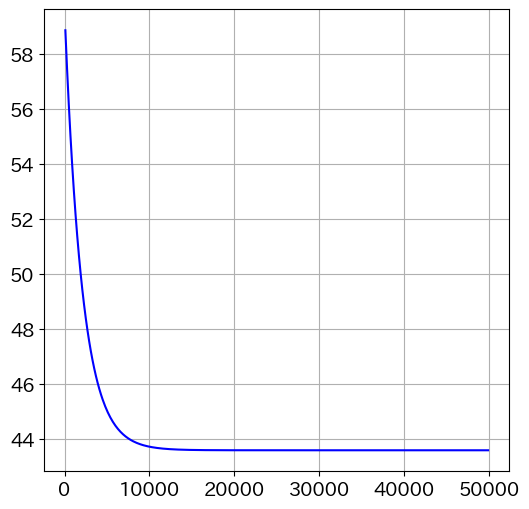

In [75]:
plt.plot(history[1:,0],history[1:,1],"b")
plt.show()

In [78]:
xse=np.array((x.min(),x.max())).reshape(-1,1)
Xse=torch.tensor(xse).float()

with torch.no_grad():
    Yse=net(Xse)

print(Yse.numpy())

[[-2.2545]
 [45.2429]]


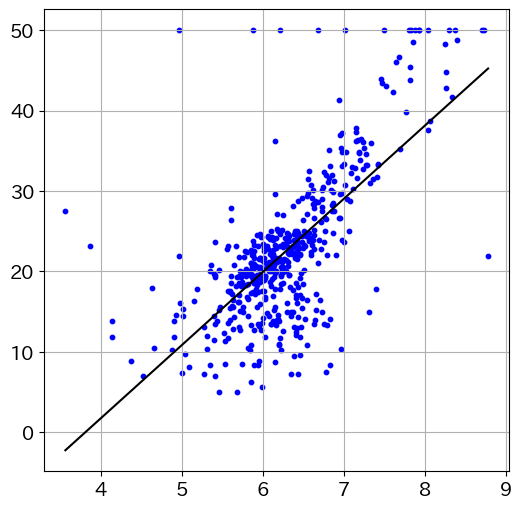

In [81]:
plt.plot(Xse.data, Yse.data, c="k")
plt.scatter(x,yt,s=10,c="b")

## 重回帰

In [157]:
x_add=x_org[:,feature_names=="LSTAT"]
x2=np.hstack((x,x_add))
x2[:5,:]

array([[6.575, 4.98 ],
       [6.421, 9.14 ],
       [7.185, 4.03 ],
       [6.998, 2.94 ],
       [7.147, 5.33 ]])

In [158]:
n_input=x2.shape[1]

In [159]:
inputs=torch.tensor(x2).float()

In [243]:
class Net(nn.Module):
    def __init__(self,n_input,n_output,n_hidden):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

        # nn.init.constant_(self.l1.weight, 1.0)
        # nn.init.constant_(self.l1.bias, 1.0)

    def forward(self,x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [244]:
lr=0.001 #学習率の変更
net=Net(n_input,1,10)
criterion=nn.MSELoss()
optimizer=optim.SGD(net.parameters(),lr=lr)
num_epochs=10000
history=np.zeros((0,2))

In [245]:
for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs=net(inputs)

    loss=criterion(outputs,labels1)

    loss.backward()

    optimizer.step()

    if epoch%100==0:
        history=np.vstack((history,np.array([epoch,loss.item()])))
        if epoch%1000==0:
            print(f"{epoch},{loss}")

0,528.75390625
1000,25.371646881103516
2000,22.674808502197266
3000,21.93764305114746
4000,21.64118003845215
5000,21.5527286529541
6000,21.503480911254883
7000,21.478017807006836
8000,21.432273864746094
9000,21.405221939086914


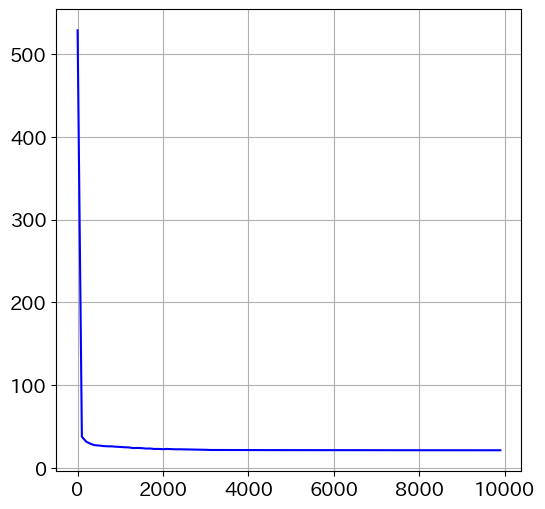

In [246]:
plt.plot(history[:,0],history[:,1],"b")

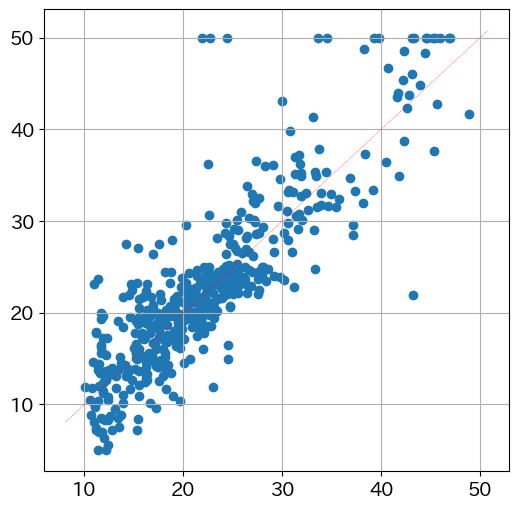

In [249]:
outputs_np=outputs.detach().numpy()
labels_np=labels.detach().numpy()
plt.scatter(outputs_np,labels_np)
x_range=np.linspace(plt.xlim()[0],plt.xlim()[1])
plt.plot(x_range, x_range, "r--", linewidth=0.25)